In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('winequality-red.csv')

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns # the quality is the target variable that we have to predict.

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.isnull().sum() # no null or Nan values.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# THE UNIVARIATE ANALYSIS

In [7]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


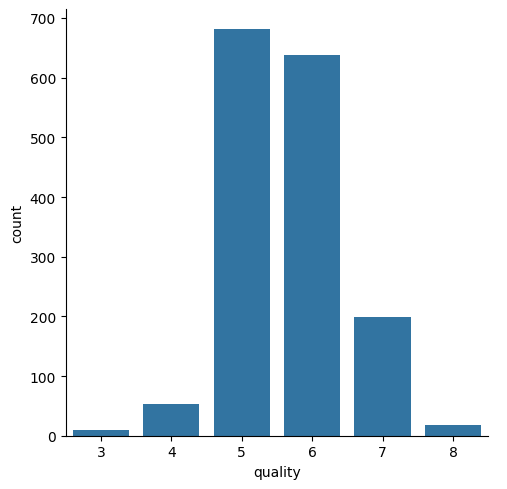

In [8]:
sns.catplot(x='quality', data = df, kind = 'count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

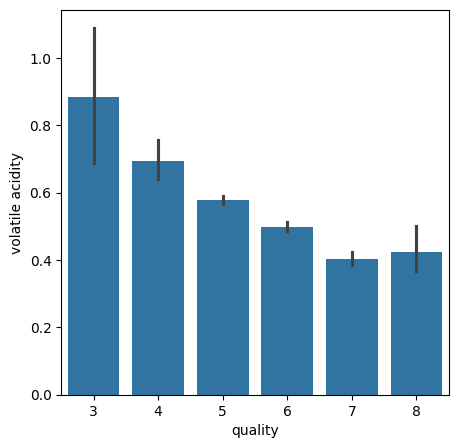

In [9]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = df)

<Axes: xlabel='quality', ylabel='fixed acidity'>

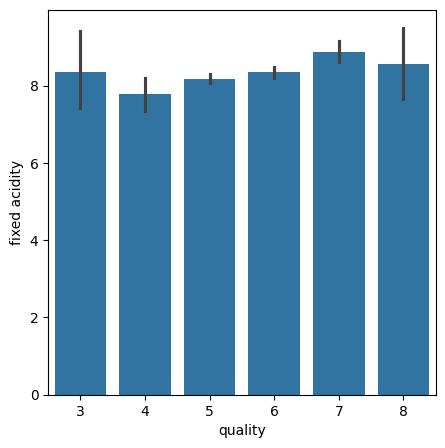

In [10]:
# fixed acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'fixed acidity', data = df)

<Axes: xlabel='quality', ylabel='citric acid'>

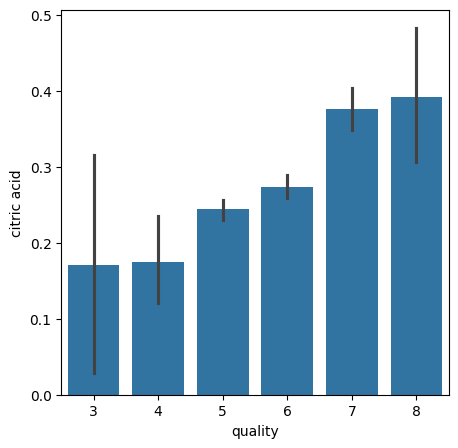

In [11]:
# citric acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = df)

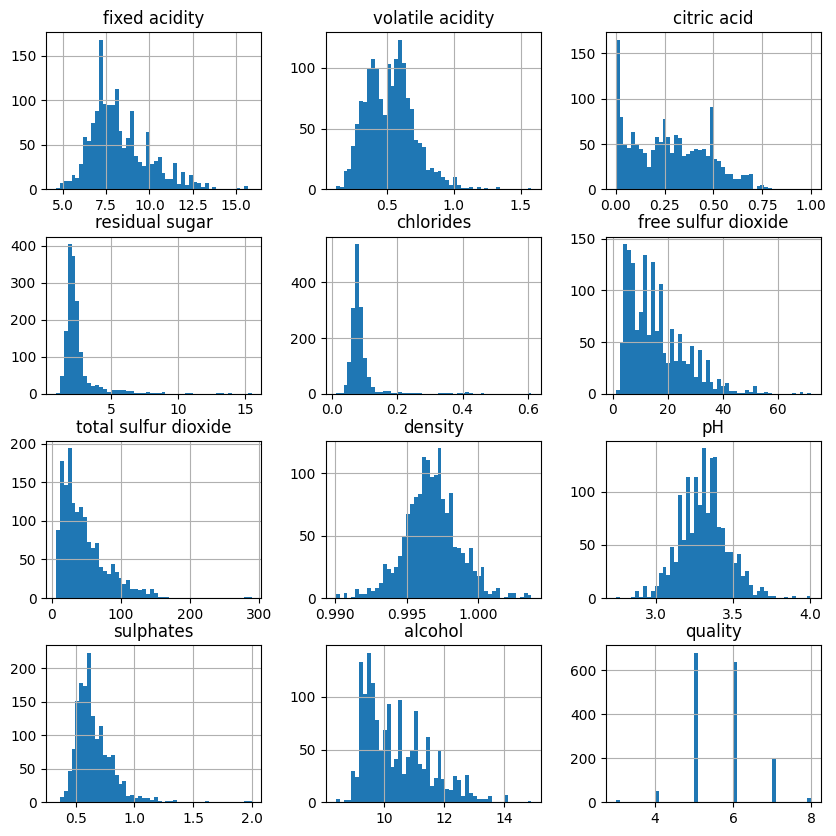

In [12]:
df.hist(figsize=(10,10),bins=50)
plt.show()

<Axes: >

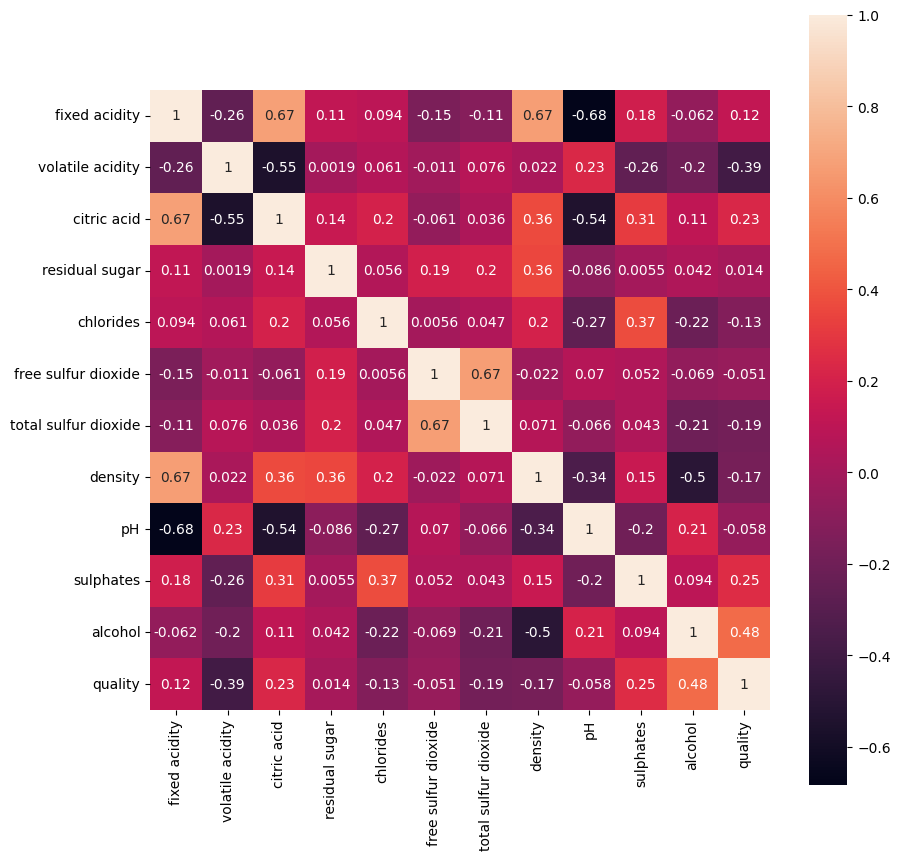

In [13]:
#corelation matrix.
cor_mat= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=cor_mat,square=True,annot=True,cbar=True)

# Data Preprocessing

In [14]:
# separate the data and Label
X = df.drop('quality',axis=1)

In [15]:
print(X)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [16]:
#Label Binarizaton
Y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)

In [17]:
from sklearn.model_selection import train_test_split,cross_validate

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [19]:
#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier


In [20]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]

In [22]:
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

In [23]:
acc=[]
d={}

In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report  # for classification

In [25]:
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,Y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,Y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.896875,
  0.896875,
  0.884375,
  0.86875,
  0.925,
  0.915625,
  0.9375,
  0.85625]}

In [26]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.896875
1,LinearSVM,0.896875
2,rbfSVM,0.884375
3,KNearestNeighbors,0.868750
4,RandomForestClassifier,0.925000
5,DecisionTree,0.915625
6,GradientBoostingClassifier,0.937500
7,GaussianNB,0.856250


<Axes: xlabel='Accuracy', ylabel='Modelling Algo'>

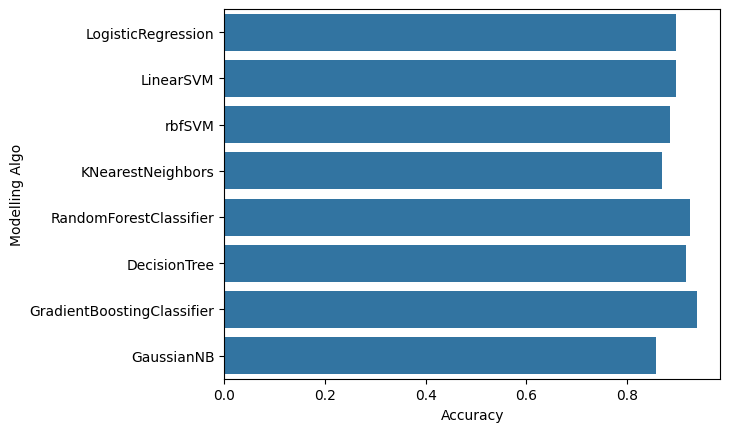

In [27]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

# HYPER PARAMETER TUNING

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=5)
clf_rf.fit(X_train,Y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 666, i

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [500]},
             scoring='accuracy')

In [30]:
clf_rf.best_score_

0.9014644607843139

In [31]:
clf_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [47]:
pred=clf_rf.predict(X_test)

In [48]:
accuracy = accuracy_score(Y_test, pred)
report = classification_report(Y_test, pred)
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.934375
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       283
           1       0.81      0.57      0.67        37

    accuracy                           0.93       320
   macro avg       0.88      0.77      0.82       320
weighted avg       0.93      0.93      0.93       320



In [33]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=5,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': [500]})

In [34]:
clf_gb.best_score_

0.8842616421568626

In [35]:
clf_gb.best_params_

{'n_estimators': 500}

In [49]:
pred=clf_gb.predict(X_test)


In [50]:
accuracy = accuracy_score(Y_test, pred)
report = classification_report(Y_test, pred)
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.94375
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       283
           1       0.81      0.68      0.74        37

    accuracy                           0.94       320
   macro avg       0.88      0.83      0.85       320
weighted avg       0.94      0.94      0.94       320



In [37]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=5)
clf_lr.fit(X_train,Y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [38]:
clf_lr.best_params_

{'C': 1000, 'penalty': 'l2'}

In [39]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8772426470588236

In [51]:
pred=clf_lr.predict(X_test)

In [52]:
accuracy = accuracy_score(Y_test, pred)
report = classification_report(Y_test, pred)
print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.909375
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       283
           1       0.68      0.41      0.51        37

    accuracy                           0.91       320
   macro avg       0.80      0.69      0.73       320
weighted avg       0.90      0.91      0.90       320



In [53]:
feature_importances = clf_rf.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Wine Quality Prediction')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

# Building a Predictive System

In [41]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


In [42]:
prediction = clf_rf.predict(input_data_reshaped)
print(prediction)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[0]


In [43]:
if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

Bad Quality Wine
